In [2]:
import pickle
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from common import print_metric_names

# Uniform Hypersphere Surface

In [3]:
result_df = pd.read_csv("../results/result-tables/uniform-hypersphere-surface.csv")
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,dim,syn_radius
0,I-Prec,0,uniform-hypersphere-surface,0,0.0,2,0.100
1,I-Rec,0,uniform-hypersphere-surface,0,0.0,2,0.100
2,Density,0,uniform-hypersphere-surface,0,0.0,2,0.100
3,Coverage,0,uniform-hypersphere-surface,0,0.0,2,0.100
4,I-Prec,0,uniform-hypersphere-surface,0,0.0,2,0.136
...,...,...,...,...,...,...,...
18355,P-Rec,2,uniform-hypersphere-surface,9,1.0,128,1.828
18356,P-Prec,2,uniform-hypersphere-surface,9,0.0,128,1.864
18357,P-Rec,2,uniform-hypersphere-surface,9,1.0,128,1.864
18358,P-Prec,2,uniform-hypersphere-surface,9,0.0,128,1.900


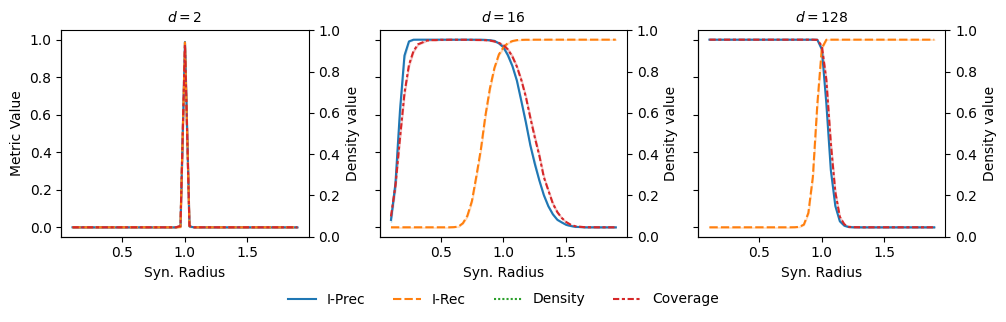

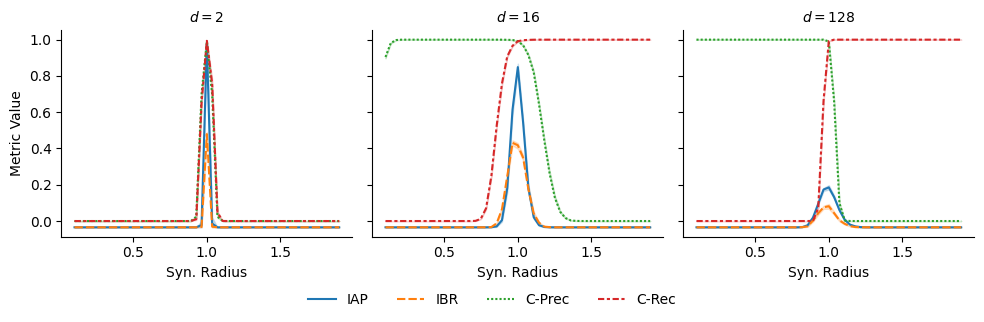

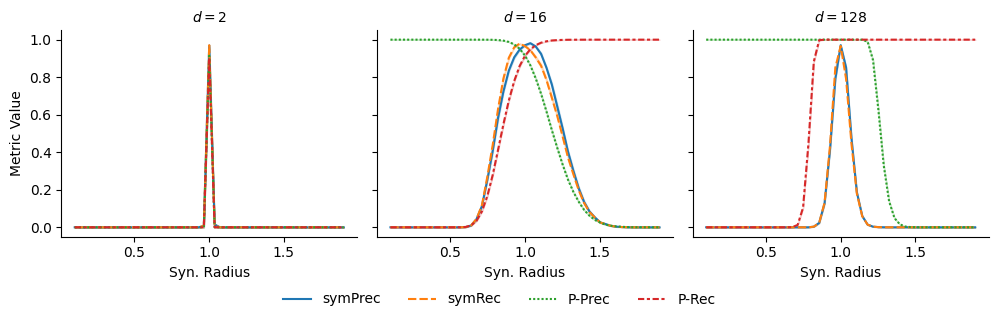

In [4]:
for i in range(3):
    subset_df = result_df[(result_df.metric_group == i) & (result_df.Metric != "Density")]
    g = sns.FacetGrid(subset_df, col="dim", sharex="col")

    if i == 0:
        g.map_dataframe(
            sns.lineplot, x="syn_radius", y="value", 
            hue="Metric", 
            hue_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
            style="Metric",
            style_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
        )
        for dim, ax in g.axes_dict.items():
            density_ax = ax.twinx()
            density_df = result_df[(result_df.Metric == "density") & (result_df.dim == dim)]
            density_ax.set_ylabel("Density value")
            sns.lineplot(
                data=density_df, x="syn_radius", y="value", ax=density_ax,
                hue="Metric", 
                hue_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
                style="Metric",
                style_order=["I-Prec", "I-Rec", "Density", "Coverage"], 
                legend=False,
            )
    else:
        g.map_dataframe(sns.lineplot, x="syn_radius", y="value", hue="Metric", style="Metric")

    g.set_titles("$d = {col_name}$")
    g.set_xlabels("Syn. Radius")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.05), ncol=4)
    plt.tight_layout()
    plt.savefig("../figures/hypersphere/uniform_hypersphere_surface_{}.pdf".format(i), bbox_inches="tight")
    plt.show()

# Sphere vs. Torus

In [5]:
result_df = pd.read_csv("../results/result-tables/sphere-torus.csv")
col_names = {
    "real_sphere": "Sphere is real",
    "real_torus": "Torus is real",
}
result_df.real_dist = result_df.real_dist.map(col_names)
result_df.Metric = result_df.Metric.map(print_metric_names)
result_df

,Metric,metric_group,Sanity Check,repeat_ind,value,real_dist,n_syn
0,I-Prec,0,sphere-torus,0,0.020000,Sphere is real,100
1,I-Rec,0,sphere-torus,0,0.006000,Sphere is real,100
2,Density,0,sphere-torus,0,0.016000,Sphere is real,100
3,Coverage,0,sphere-torus,0,0.004000,Sphere is real,100
4,I-Prec,0,sphere-torus,0,0.015748,Sphere is real,127
...,...,...,...,...,...,...,...
4795,P-Rec,2,sphere-torus,9,0.016489,Torus is real,6158
4796,P-Prec,2,sphere-torus,9,0.001164,Torus is real,7847
4797,P-Rec,2,sphere-torus,9,0.006815,Torus is real,7847
4798,P-Prec,2,sphere-torus,9,0.001629,Torus is real,10000


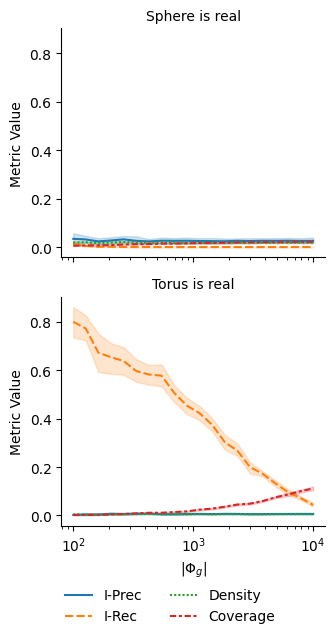

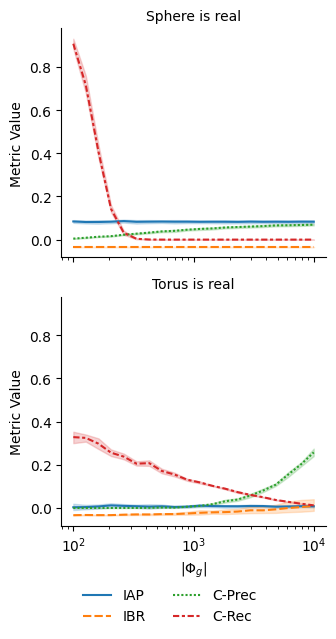

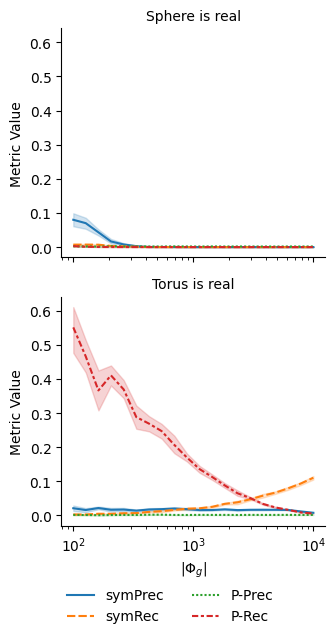

In [6]:
for i in range(3):
    subset_df = result_df[result_df.metric_group == i]
    g = sns.FacetGrid(subset_df, row="real_dist")
    g.map_dataframe(sns.lineplot, x="n_syn", y="value", hue="Metric", style="Metric")
    g.set_titles("{row_name}")
    g.set_xlabels("$|\Phi_g|$")
    g.set(xscale="log")
    g.set_ylabels("Metric Value")
    g.add_legend()
    sns.move_legend(g, "upper center", bbox_to_anchor=(0.5, 0.03), ncol=2)
    g.figure.set_size_inches(3.5, 6)
    plt.tight_layout()
    plt.savefig("../figures/hypersphere/sphere_torus{}.pdf".format(i), bbox_inches="tight")
    plt.show()